# Classification of Poisonous Mushrooms

### librrary import 

In [102]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from keras.preprocessing.image import ImageDataGenerator
from os import walk
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [2]:
print(f"Num GPUs Available: {len(tf.config.experimental.list_physical_devices('GPU'))}")


Num GPUs Available: 1


In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.device('/physical_device:GPU:0')

### constance

In [5]:
"""
dir paths
"""
output_dir = '../models'

"""
trainingt image parameters
"""
img_height = 100
img_width =100
np.random.seed(42)

## Create Data set 

get file path

In [6]:
mypath_ce = '../data/edible mushroom sporocarp'
mypath_ncvc = '../data/edible sporocarp'
mypath_cv = '../data/poisonous mushroom sporocarp'
mypath_nncv = '../data/poisonous sporocarp'

filenames_ce = next(walk(mypath_ce), (None, None, []))[2]
filenames_ncvc = next(walk(mypath_ncvc), (None, None, []))[2]
filenames_cv = next(walk(mypath_cv), (None, None, []))[2]
filenames_nncv = next(walk(mypath_nncv), (None, None, []))[2]



### make stuctured path - mushroom relation

In [7]:
files = []
files.extend( [[1,'ce','data/edible mushroom sporocarp/'+file] for file in filenames_ce] )
#files.extend( [[1,'ncvc','data/edible sporocarp/'+file] for file in filenames_ncvc] )
files.extend( [[0,'cv','data/poisonous mushroom sporocarp/'+file] for file in filenames_cv] )
#files.extend( [[0,'nncv','data/poisonous sporocarp/'+file] for file in filenames_nncv] )

np.random.shuffle(np.asarray(files))

Crate DataFrame by our data

In [8]:
mushrooms = pd.DataFrame(files,columns=['edible', 'type', 'path'])

mushrooms = mushrooms.sample(frac = 1)
mushrooms

edible type                                               path
1079        1   ce   data/edible mushroom sporocarp/edible  (709).png
4773        1   ce  data/edible mushroom sporocarp/732_a2AOpcFRwwA...
9546        0   cv  data/poisonous mushroom sporocarp/652_8KyCJUS8...
8274        0   cv     data/poisonous mushroom sporocarp/cv (409).jpg
6433        1   ce  data/edible mushroom sporocarp/0566_excfNs6e4d...
...       ...  ...                                                ...
11391       0   cv  data/poisonous mushroom sporocarp/304_fF9sgw_c...
10858       0   cv  data/poisonous mushroom sporocarp/221_n-Jj_NnJ...
4898        1   ce  data/edible mushroom sporocarp/0547_I0TAoRXwrs...
4077        1   ce  data/edible mushroom sporocarp/423_oyOACvMD_p4...
5356        1   ce  data/edible mushroom sporocarp/SL2011PIC161193...

[11703 rows x 3 columns]

### Preprocessing photos from files to dataframe 
- get image from file 
- load image 
- convert image to grayscale
- preprocessing image to array

In [9]:
from PIL import Image

In [10]:
preproc = False

if preproc:
    images = []

    for image_path in list(mushrooms.path):
        full_path = os.path.join(os.getcwd(),"..",image_path)
    
        #image = mahotas.imread(full_path)
        image = tf.keras.preprocessing.image.load_img(full_path,color_mode='rgb',target_size=(img_height,img_width))
        #image = tf.image.rgb_to_grayscale(image)
    
        
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        images.append(input_arr)
        
    
    images = np.asarray(images)
    np.save('../data/preproc_images',images)
    x = images
else:
    
    images = np.load('../data/preproc_images.npy')
    x = images
images.shape

(11703, 100, 100, 3)

In [11]:
y = np.asarray(mushrooms.edible)
y

array([1, 1, 0, ..., 1, 1, 1])

## Augmentation 

In [12]:
'''
aug_image =[]
aug_y = []
for image in range(len(x)):
    samples = np.expand_dims(images[image], 0)
    datagen = ImageDataGenerator(rotation_range=180,zoom_range=[0.5,1.0])
    
    it = datagen.flow(samples, batch_size=1)
    for i in range(2):
        batch = it.next()
        aug_y.append(y[image])
        aug_image.append(batch[0].astype('uint8'))
np.save('../data/preproc_aug_images',aug_image)
np.save('../data/preproc_aug_y',aug_y)
np.shape(aug_image)
'''


"\naug_image =[]\naug_y = []\nfor image in range(len(x)):\n    samples = np.expand_dims(images[image], 0)\n    datagen = ImageDataGenerator(rotation_range=180,zoom_range=[0.5,1.0])\n    \n    it = datagen.flow(samples, batch_size=1)\n    for i in range(2):\n        batch = it.next()\n        aug_y.append(y[image])\n        aug_image.append(batch[0].astype('uint8'))\nnp.save('../data/preproc_aug_images',aug_image)\nnp.save('../data/preproc_aug_y',aug_y)\nnp.shape(aug_image)\n"

In [13]:
'''
x = np.load('../data/preproc_aug_images.npy')
y = np.load('../data/preproc_aug_y.npy')
'''

"\nx = np.load('../data/preproc_aug_images.npy')\ny = np.load('../data/preproc_aug_y.npy')\n"

## Vizualyze images

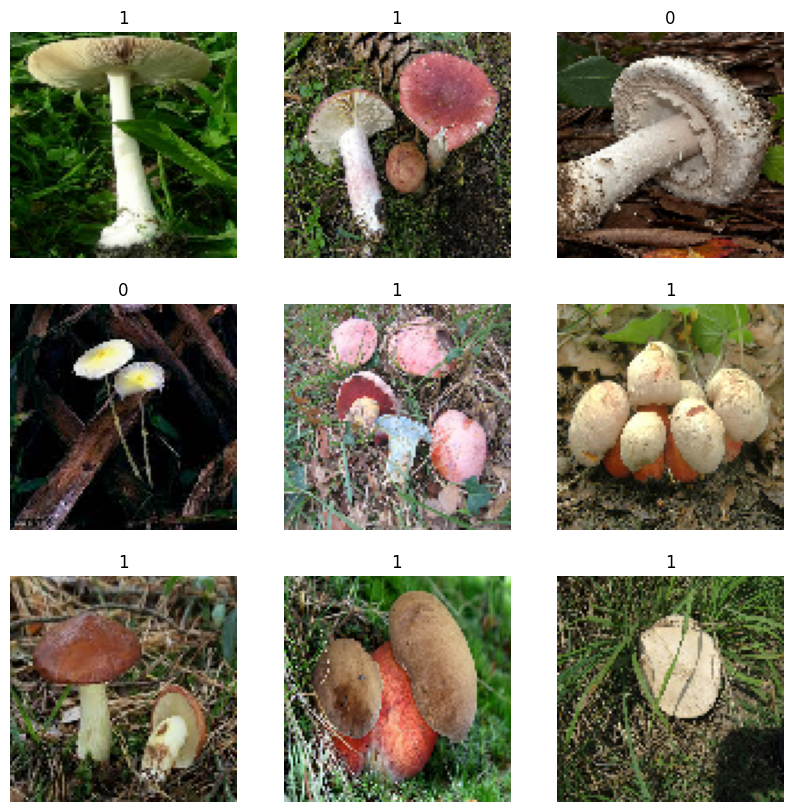

In [14]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].astype("uint8"))
    plt.title(y[i])
    plt.axis("off")
plt.show()

### Count of data in each class 

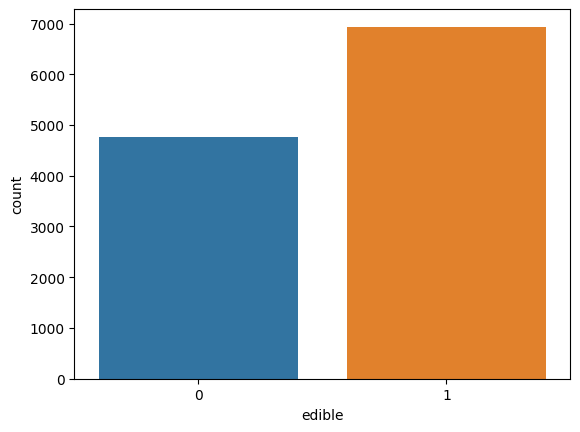

In [15]:
ax = sns.countplot(x="edible", data=mushrooms)
plt.show()

## Create input data 

make train/yest dataset

In [16]:
'''
X_val = x[15000:]
y_val = y[15000:]
x = x[:15000]
y = y[:15000]
'''

'\nX_val = x[15000:]\ny_val = y[15000:]\nx = x[:15000]\ny = y[:15000]\n'

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.99, random_state=42)
X_train=np.asarray(X_train)/255
X_test=np.asarray(X_test)/255
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.99, random_state=2002)

print(np.shape(X_train))

(9269, 100, 100, 3)


In [18]:
print(y_train[0])

1


## Create model 

In [19]:


class PlotLearning(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(25,5))
        clear_output(wait=True)
        
        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric + f" = {self.metrics[metric][-1]}")
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric+ f" = {self.metrics['val_' + metric][-1]}")
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
        

In [20]:


my_model = tf.keras.Sequential([
    #filters=128, kernel_size=(11,11), strides=(4,4)
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                         input_shape=(100,100,3)),
    keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(4,4)),

  
    
  tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  

    
  tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='sigmoid'),
    keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    

    
  tf.keras.layers.Flatten(),
    
 
 
  tf.keras.layers.Dense(2000,activation='sigmoid'),
  keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2000,activation='sigmoid'),
  keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1000,activation='sigmoid'),
  keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(500,activation='sigmoid'),
  keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


my_model.compile(
    optimizer="Adam",
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
                       
    
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=output_dir+
                                  "/mymodel/weights.{epoch:02d}.hdf5")

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 128)      512       
 hNormalization)                                                 
                                                        

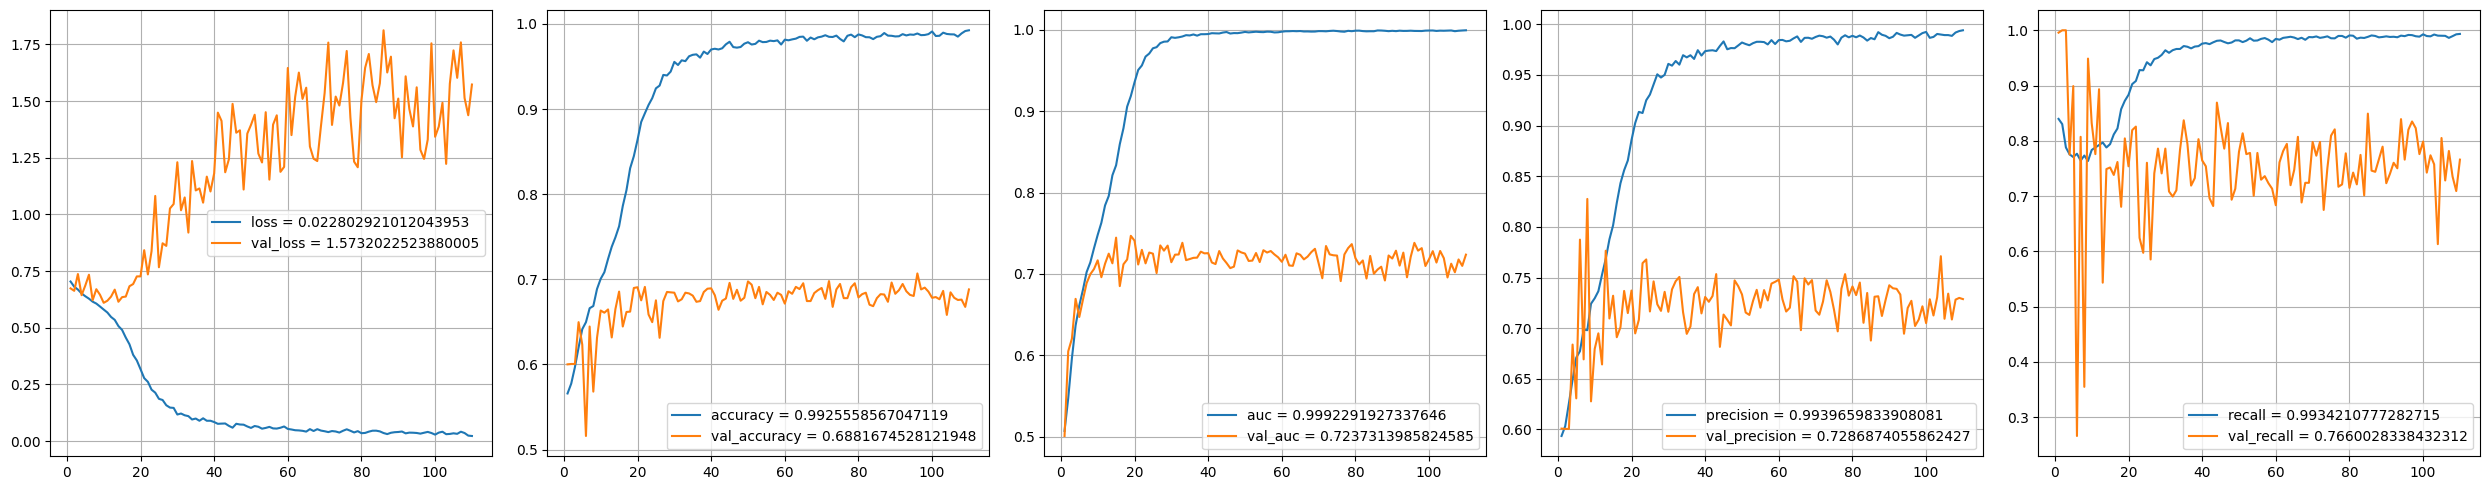

232/232 [==============================] - 29s 123ms/step - loss: 0.0228 - accuracy: 0.9926 - auc: 0.9992 - precision: 0.9940 - recall: 0.9934 - val_loss: 1.5732 - val_accuracy: 0.6882 - val_auc: 0.7237 - val_precision: 0.7287 - val_recall: 0.7660


In [21]:
plot =PlotLearning()

tf.random.set_seed(2002)

my_model.fit(np.array(X_train), np.array(y_train),
          batch_size=40,
          validation_data=(np.array(X_test),np.array(y_test)),
          epochs=110,
          callbacks=[modelcheckpoint, plot])

In [47]:
    checkpoint_path = '../models/mymodel/weights.62.hdf5'
my_model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc ,auc,prec,rrec = my_model.evaluate(X_val, y_val, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
print("Restored model, AUC: {:5.2f}%".format(100 * auc))
print("Restored model, precision: {:5.2f}%".format(100 * prec))
print("Restored model, recall: {:5.2f}%".format(100 * rrec))

3/3 - 0s - loss: 1.2665 - accuracy: 0.7419 - auc: 0.7772 - precision: 0.7869 - recall: 0.8136 - 82ms/epoch - 27ms/step
Restored model, accuracy: 74.19%
Restored model, AUC: 77.72%
Restored model, precision: 78.69%
Restored model, recall: 81.36%


In [123]:
checkpoint_path = '../models/mymodel/weights.62.hdf5'
my_model.load_weights(checkpoint_path)
from sklearn.metrics import confusion_matrix
y_pred = my_model.predict(X_val)
pred_distribut = y_pred.copy()

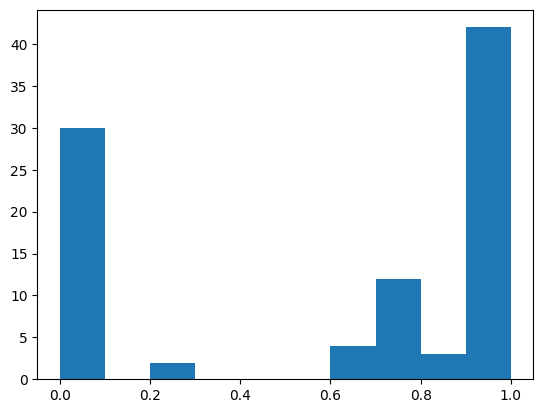

In [124]:
plt.hist(y_pred, 10)
plt.show()

In [125]:

y_pred = [1 if pred > 0.8 else 0 for pred in y_pred]
cf = confusion_matrix(y_val,y_pred)


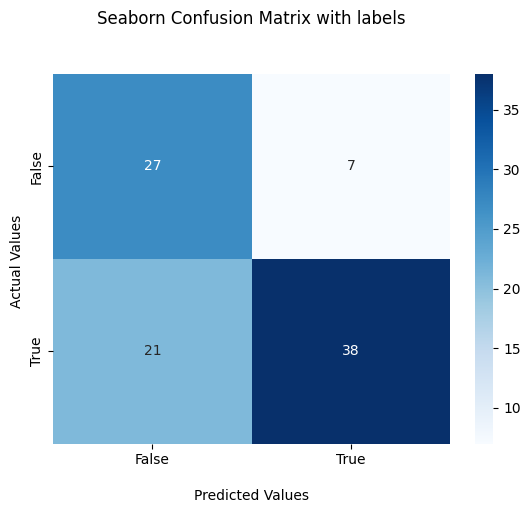

In [126]:

import seaborn as sns
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [127]:
len(X_val)

93

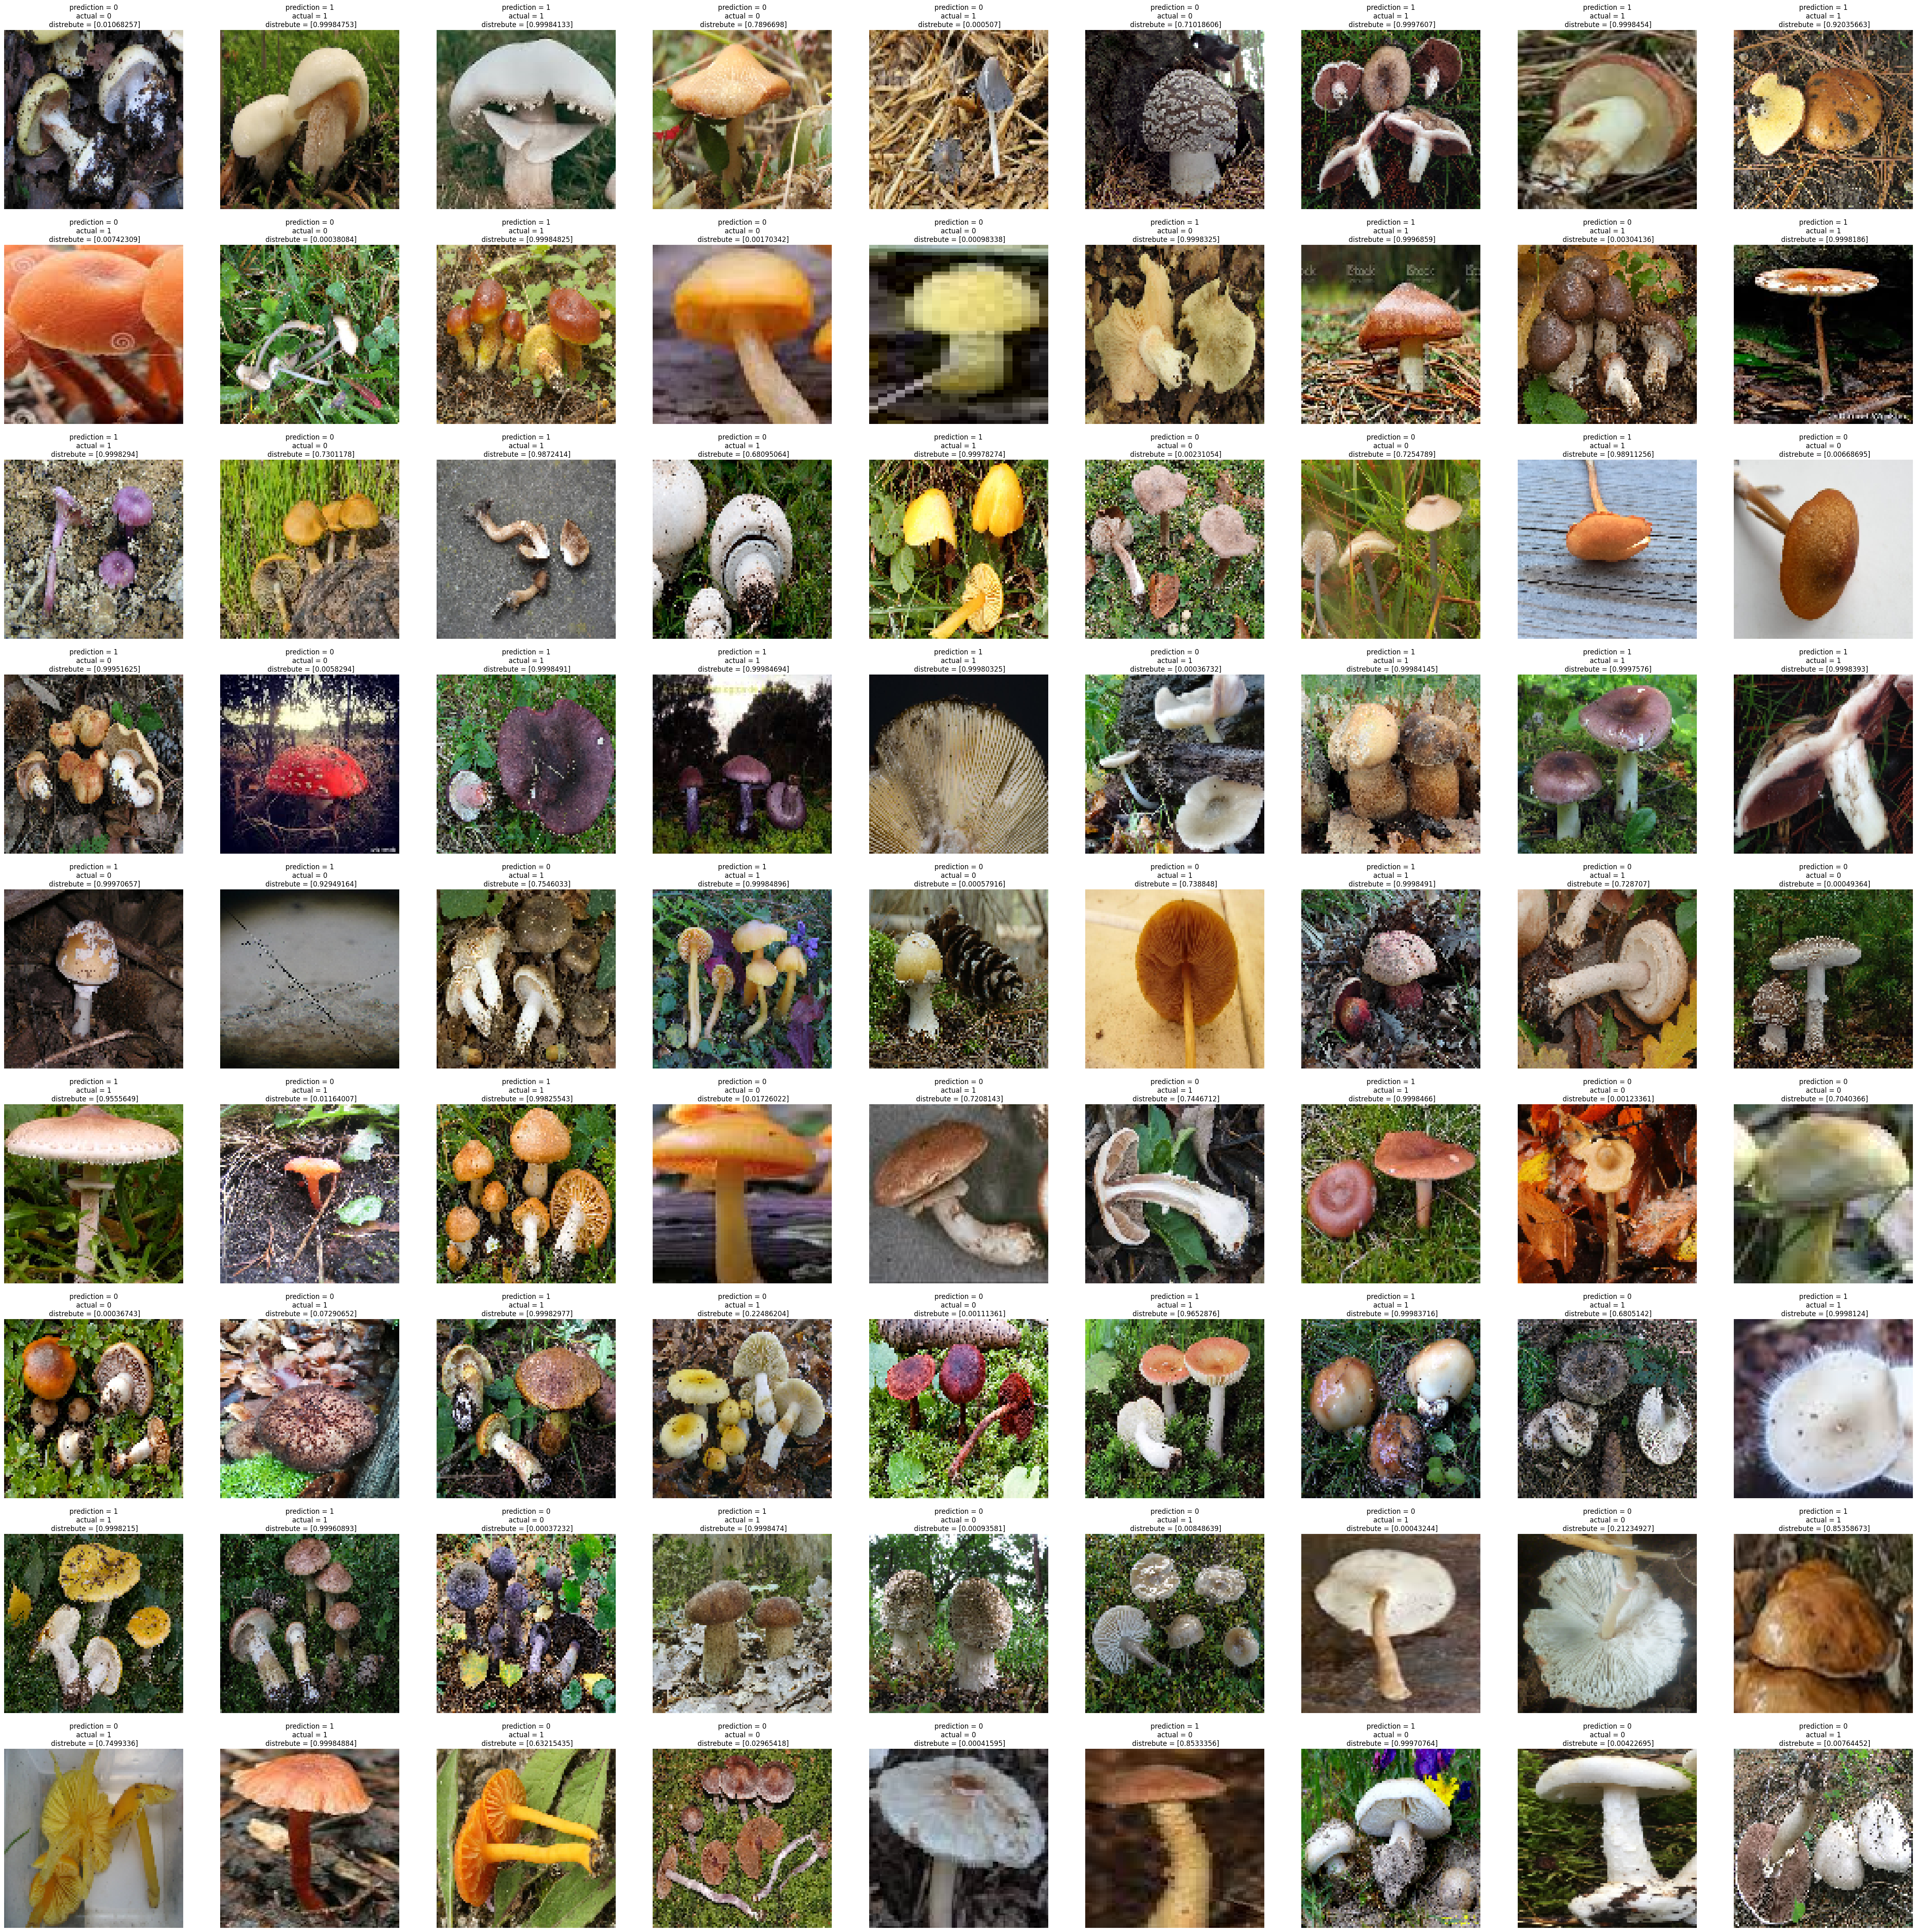

In [128]:


plt.figure(figsize=(60, 60))
for i in range(81):
    ax = plt.subplot(int(math.sqrt(len(X_val))),int(math.sqrt(len(X_val))), i +1)
    plt.imshow((X_val[i]*255).astype("uint8"))
    plt.title(f'prediction = {y_pred[i]}\n actual = {y_val[i]} \n distrebute = {pred_distribut[i]}')
    plt.axis("off")
plt.show()

# Ather ML models

## prepear Data, feature and labels

In [75]:
import mahotas
import mahotas.demos

In [65]:
preproc = False

if preproc:
    images = []

    for image_path in list(mushrooms.path):
        full_path = os.path.join(os.getcwd(),"..",image_path)
    
        #image = mahotas.imread(full_path)
        image = tf.keras.preprocessing.image.load_img(full_path,color_mode='rgb',target_size=(img_height,img_width))
        image = tf.image.rgb_to_grayscale(image)
    
        
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        images.append(input_arr)
        
    
    images = np.asarray(images)
    np.save('../data/preproc_images_for_filters',images)
    x = images
else:
    
    images = np.load('../data/preproc_images_for_filters.npy')
    x = images
images.shape

(11703, 100, 100, 1)

In [66]:
"""
for image_path in list(mushrooms.path):
    full_path = os.path.join(os.getcwd(),"..",image_path)
    
    #image = mahotas.imread(full_path)
    image = tf.keras.preprocessing.image.load_img(full_path,color_mode='rgb',target_size=(img_height,img_width))
    image = tf.image.rgb_to_grayscale(image)
    
        
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    images.append(input_arr)
    
       
x = images
"""

'\nfor image_path in list(mushrooms.path):\n    full_path = os.path.join(os.getcwd(),"..",image_path)\n    \n    #image = mahotas.imread(full_path)\n    image = tf.keras.preprocessing.image.load_img(full_path,color_mode=\'rgb\',target_size=(img_height,img_width))\n    image = tf.image.rgb_to_grayscale(image)\n    \n        \n    input_arr = tf.keras.preprocessing.image.img_to_array(image)\n    images.append(input_arr)\n    \n       \nx = images\n'

In [67]:
x = [image.astype(int)for image in x]

In [68]:
y = list(mushrooms.edible)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(np.shape(X_train[0]))

(100, 100, 1)


## Create feature extraction function, using Haralick texture filters

In [69]:
def create_features(images,label):
    features = []
    labels = []
    for mushroom in range(len(images)):
        try:
            features.append(mahotas.features.haralick(images[mushroom].reshape((img_height,img_height))).ravel())
        except:
            print(images[mushroom].shape)
        labels.append(label[mushroom])
    features = np.array(features)
    labels = np.array(labels)
    return (features, labels) 

## extract features

In [70]:
features_train, labels_train = create_features(X_train,y_train)
features_test, labels_test = create_features(X_test,y_test)

## import ML models 

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF

## Fit all models

In [72]:
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
scores_train = []
scores_test = []

for name, clf in zip(names, classifiers):
    print(name)
    clf = Pipeline([('preproc', StandardScaler()), ('classifier', clf)])
    clf.fit(features_train, labels_train)
    score_train = clf.score(features_train, labels_train)
    score_test = clf.score(features_test, labels_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Make some score board

In [73]:
res = pd.DataFrame(index = names)
res['scores_train'] = scores_train
res['scores_test'] = scores_test
res.columns = ['Train','Test']
res.index.name = "Classifier accuracy"
pd.options.display.float_format = '{:,.2f}'.format
print(res)

                     Train  Test
Classifier accuracy             
Logistic Regression   0.65  0.64
Nearest Neighbors     0.79  0.59
Linear SVM            0.63  0.63
RBF SVM               0.94  0.59
Gaussian Process      0.67  0.66
Decision Tree         0.64  0.62
Random Forest         0.64  0.63
Neural Net            0.65  0.65
AdaBoost              0.66  0.64
Naive Bayes           0.57  0.59
QDA                   0.65  0.63


## Vizualyze models score 

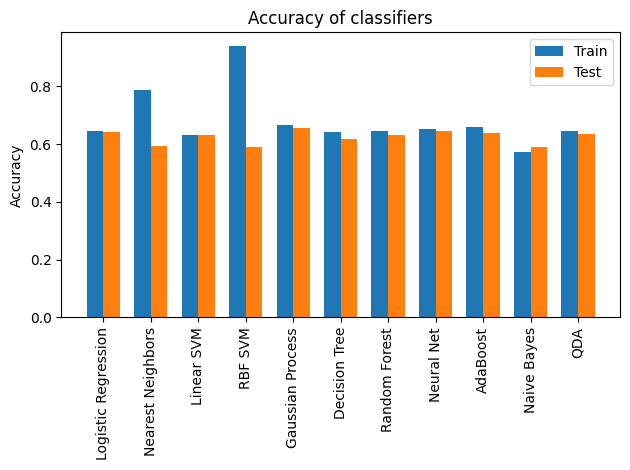

In [74]:
x = np.arange(len(names))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_train, width, label='Train')
rects2 = ax.bar(x + width/2, scores_test, width, label='Test')


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of classifiers')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(names)
ax.legend()

fig.tight_layout()

plt.show()